In [16]:

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [17]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c8220ad3ad3b4c8ab836601aada5d8b6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='PJKqGWbvDMVLsp-YbdmOk6mWpwOR7zHfgQzOilREEkWr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_c8220ad3ad3b4c8ab836601aada5d8b6.get_object(Bucket='salaryprediction-donotdelete-pr-1bwlvsqk8ctsv0',Key='homeprices.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_excel(body)
df.head()


,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


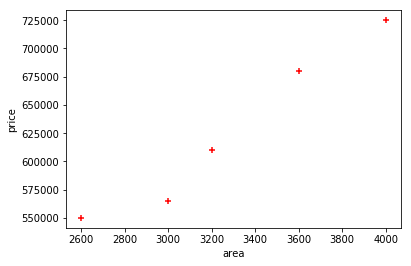

In [19]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [20]:

new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [21]:

price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [22]:
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
reg.predict([[3300]])

array([628715.75342466])

In [3]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [4]:
wml_credentials = {
  "apikey": "FwV4wvExS_H3PPQjviOF-7tPXDxCChtNur4hFY3GBkJC",
  "iam_apikey_description": "Auto-generated for key 8af1b35a-e843-4f16-a164-0cbe4e05802b",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/71172d6d8b634783a71aa251ca15a717::serviceid:ServiceId-5b238a16-1006-41d2-bf86-2ec3c620df39",
  "instance_id": "198a8437-ec6b-41cc-a405-404958295cec",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}


In [8]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [13]:
model_props = {
    client.repository.ModelMetaNames.AUTHOR_NAME : "jyothi",
    client.repository.ModelMetaNames.AUTHOR_EMAIL : "jyothiniranjanburla@gmail.com",
    client.repository.ModelMetaNames.NAME : "price data"
}

In [24]:
model_artifact = client.repository.store_model(reg,meta_props = model_props)

In [26]:
model_artifact

{'metadata': {'guid': '16ffb2d3-c1b3-4701-a81e-4e2ba82c77f8',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/198a8437-ec6b-41cc-a405-404958295cec/published_models/16ffb2d3-c1b3-4701-a81e-4e2ba82c77f8',
  'created_at': '2020-06-28T13:50:31.481Z',
  'modified_at': '2020-06-28T13:50:31.533Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/198a8437-ec6b-41cc-a405-404958295cec/published_models/16ffb2d3-c1b3-4701-a81e-4e2ba82c77f8/learning_configuration',
  'author': {'name': 'jyothi'},
  'name': 'price data',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/198a8437-ec6b-41cc-a405-404958295cec/published_models/16ffb2d3-c1b3-4701-a81e-4e2ba82c77f8/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/198a8437-ec6b-41cc-a405-404958295cec/published_models/16ffb2d3-c1b3-4701-a81e-4e2ba82c77f8/feedback',
  'latest_version': {'url': 'https:

In [27]:
guid = client.repository.get_model_uid(model_artifact)

In [28]:
guid

'16ffb2d3-c1b3-4701-a81e-4e2ba82c77f8'

In [29]:
deploy = client.deployments.create(guid,name="Home Price Prediction")



#######################################################################################

Synchronous deployment creation for uid: '16ffb2d3-c1b3-4701-a81e-4e2ba82c77f8' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='0367f02e-1968-4920-8d4d-5dc52a82fe3f'
------------------------------------------------------------------------------------------------




In [30]:
deploy

{'metadata': {'guid': '0367f02e-1968-4920-8d4d-5dc52a82fe3f',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/198a8437-ec6b-41cc-a405-404958295cec/deployments/0367f02e-1968-4920-8d4d-5dc52a82fe3f',
  'created_at': '2020-06-28T13:58:55.925Z',
  'modified_at': '2020-06-28T13:58:56.197Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'name': 'Home Price Prediction',
  'scoring_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/198a8437-ec6b-41cc-a405-404958295cec/deployments/0367f02e-1968-4920-8d4d-5dc52a82fe3f/online',
  'deployable_asset': {'name': 'price data',
   'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/198a8437-ec6b-41cc-a405-404958295cec/published_models/16ffb2d3-c1b3-4701-a81e-4e2ba82c77f8',
   'guid': '16ffb2d3-c1b3-4701-a81e-4e2ba82c77f8',
   'created_at': '2020-06-28T13:58:55.900Z',
   'type': 'model'},
  'description': 'Description of deployment',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'model_type': 'scikit-learn-0.20',
  'status'

In [31]:
scoring_endpoint = client.deployments.get_scoring_url(deploy)

In [32]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/198a8437-ec6b-41cc-a405-404958295cec/deployments/0367f02e-1968-4920-8d4d-5dc52a82fe3f/online'